In [2]:
import matplotlib as mpl
import time
import matplotlib.pyplot as plt
from qutip import *
from qutip.piqs import *
import numpy as np
import array
from tqdm import tqdm
from numpy import diff
import array

In [47]:
wz = 1
wc = 1

N = 30

gc = 0.5*np.sqrt(wz*wc)

nphot = N

a  = tensor(destroy(nphot),qeye(nphot))
b = tensor(qeye(nphot), destroy(nphot))

print(gc)

0.5


In [48]:
H0 =  wc * a.dag() * a + wz * b.dag()*b
Hint = (a.dag()+a) * (b.dag()+b)

In [65]:
i = 100
gvec = np.linspace(0.4,0.6,i)
gnd = np.zeros(i)
e1 = np.zeros(i)

In [66]:
j = 0
for g in tqdm(gvec):
    Hc = H0 + g * Hint
    evals, ekets = Hc.eigenstates()
    gnd[j] = evals[0]
    e1[j] = evals[1]
    j += 1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:02<00:00,  1.59it/s]


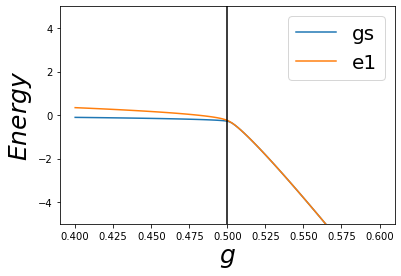

In [67]:
fig1 = plt.figure()

plt.plot(gvec, gnd, '-' ,label = "gs")
plt.plot(gvec, e1, '-' ,label = "e1")
#plt.plot(gvec, delta, '-', label = ".")
plt.ylabel(r'$Energy$', fontsize = 25)
plt.xlabel('$g$', fontsize = 25)
plt.legend(fontsize = 20)
plt.ylim((-5,5))
plt.axvline(x=gc, color = 'black')

In [53]:
dy = diff(gnd)
dx = diff(gvec)
f1 = dy/dx
gvec1 = np.linspace(0,1,99)
f2 = -diff(f1)/diff(gvec1)
gvec2 = np.linspace(0,1,98)

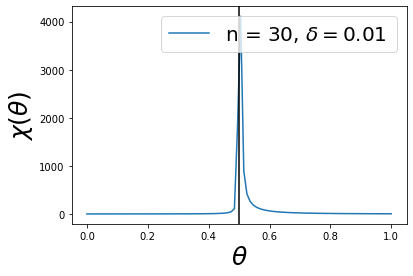

In [70]:
plt.plot(gvec2, f2, '-' ,label = "n = 30, $\delta = 0.01$ ")
plt.ylabel(r'$\chi(\theta)$', fontsize = 25)
plt.xlabel(r'$\theta$', fontsize = 25)
plt.legend(fontsize = 20)
plt.axvline(x=gc, color = 'black')